In [179]:
from src.config.settings import DATA_PATH
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy.stats import norm


plotting functions

In [180]:

def lenghts_dist(tokens, labels, labels_names, lims):
    unique_labels = np.unique(labels)
    mean_lengths = {}
    std_lengths = {}
    for label in unique_labels:
        label_lengths = np.array([len(tokens[i]) for i in range(len(tokens)) if labels[i] == label])
        mean_lengths[label] = np.mean(label_lengths)
        std_lengths[label] = np.std(label_lengths)
    for i, label in enumerate(unique_labels):
        label_lengths = [len(tokens[i]) for i in range(len(tokens)) if labels[i] == label]
        plt.hist(label_lengths, bins=30, density=True, alpha=0.5, label=labels_names[i])
        
        plt.xlim(lims)
        x = np.linspace(lims[0], lims[1], 100)
        p = norm.pdf(x, mean_lengths[label], std_lengths[label])
        plt.plot(x, p, 'k', linewidth=2)

    plt.xlabel('Lengths')
    plt.ylabel('Probability Density')
    plt.title('Distribution of Lengths by Labels')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()

def barplot(title, val, rotation):
    plt.figure(figsize=(15, 5))
    plt.title(title)
    bar = plt.bar(height = val.values(), x=np.arange(len(val)))

    #add text value
    for bar, value in zip(bar, val.values()):
        plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(), value, ha='center', va='bottom', fontsize=10)
    plt.xticks(np.arange(len(val)),val.keys(), rotation=rotation)
    plt.xlabel('source')
    plt.ylabel('count')
    plt.show()

import data (the lenghts visualizatin require preprocessing)

In [181]:
file_name_english = 'english_news.csv'
file_name_japan = 'japanese_news.csv'

data_file_path_english = os.path.join(DATA_PATH, 'raw', file_name_english)
data_file_path_japane = os.path.join(DATA_PATH, 'raw', file_name_japan)
features_file_path = os.path.join(DATA_PATH, 'processed','english_capped_vocab_tokens.npy')
vocab_file_path = os.path.join(DATA_PATH, 'processed', 'english_capped_vocab_vocab.npy')
bow_file_path = os.path.join(DATA_PATH, 'processed', 'english_capped_vocab_bow.pt')
targets_file_path = os.path.join(DATA_PATH, 'processed', 'english_capped_vocab_targets.npy')
labels_path = os.path.join(DATA_PATH, 'additional', 'english_capped_vocab_labels.json')

j_data_file_path_english = os.path.join(DATA_PATH, 'raw', file_name_english)
j_data_file_path_japane = os.path.join(DATA_PATH, 'raw', file_name_japan)
j_features_file_path = os.path.join(DATA_PATH, 'processed','japanses_capped_vocab_tokens.npy')
j_vocab_file_path = os.path.join(DATA_PATH, 'processed', 'japanses_capped_vocab_vocab.npy')
j_bow_file_path = os.path.join(DATA_PATH, 'processed', 'japanses_capped_vocab_bow.pt')
j_targets_file_path = os.path.join(DATA_PATH, 'processed', 'japanses_capped_vocab_targets.npy')
j_labels_path = os.path.join(DATA_PATH, 'additional', 'japanses_capped_vocab_labels.json')

df_english = pd.read_csv(data_file_path_english, sep='\t', dtype=str).reset_index(drop=True);
df_japan = pd.read_csv(data_file_path_japane, sep='\t', dtype=str).reset_index(drop=True);

sources_count_english = df_english['source'].value_counts().to_dict()
sources_count_japanese = df_japan['source'].value_counts().to_dict()


## label balance

from the graphs above it is clear that the source labels are quite unbalanced. Especially for the english journals, which only have two labels, the balance is extreme. A classifier that only classifies "The japan times" would have an accuracy of 99.8%, this makes it important to come up with a classifier that handles unbalanced classes and to look at unweighted metrics

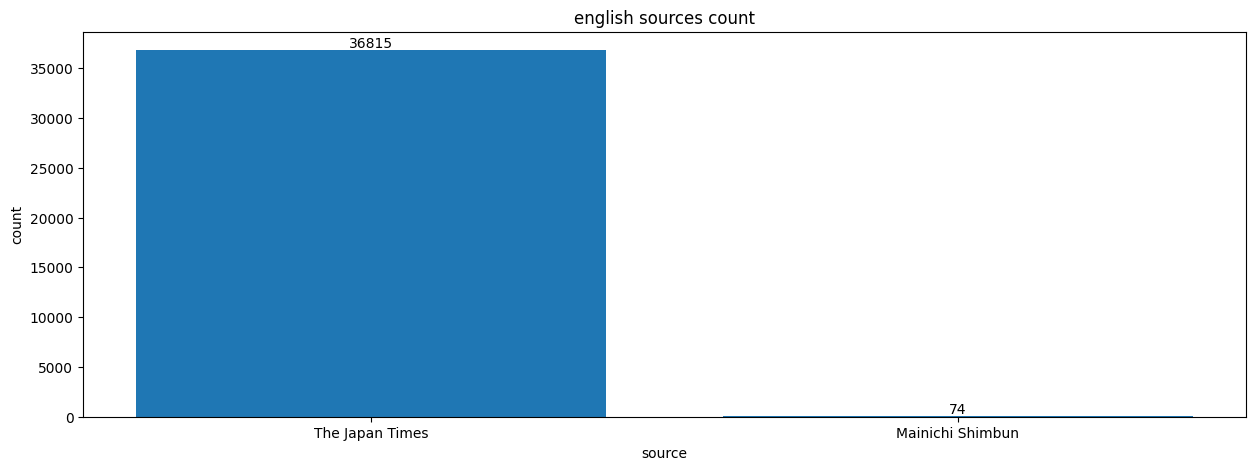

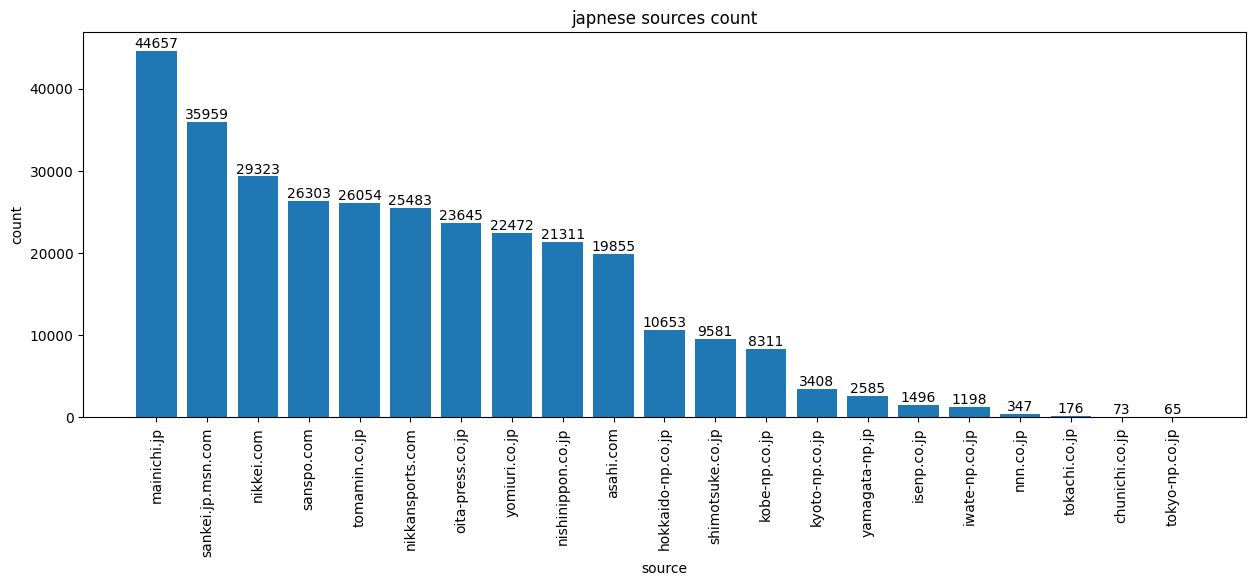

In [182]:
sources_count_english = df_english['source'].value_counts().to_dict()
sources_count_japanese = df_japan['source'].value_counts().to_dict()

barplot('english sources count',sources_count_english, 0)
barplot('japnese sources count',sources_count_japanese, 90)


### lenghts distribution

the lenght of the text could be an important predictor of the jornal, this turned out to be true for the english journals but not for the japanese

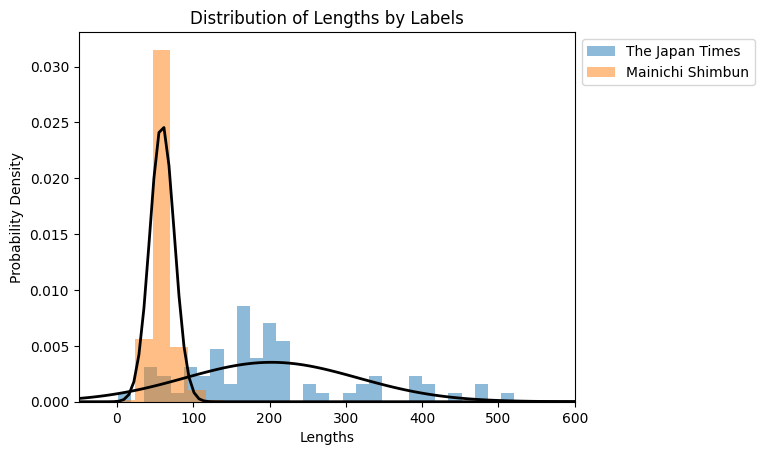

In [183]:
english_tokens = np.load(features_file_path, allow_pickle=True)
english_labels = np.load(targets_file_path)
lenghts_dist(english_tokens, english_labels,list(sources_count_english.keys()), lims=(-50, 600) )

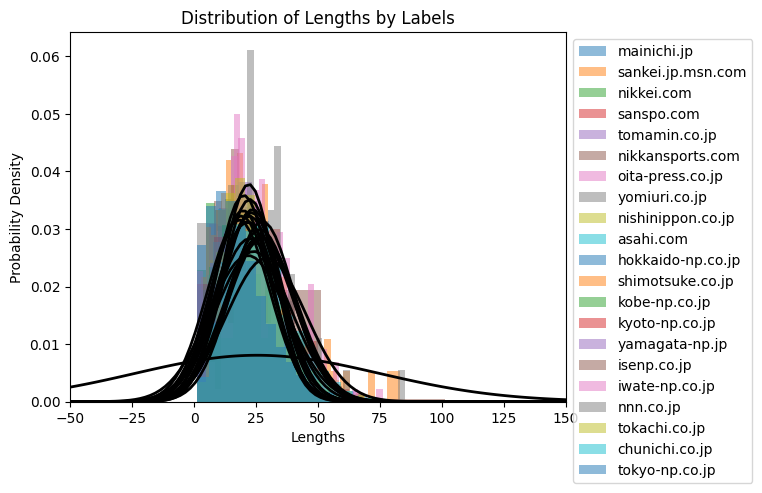

In [184]:
japanese_tokens = np.load(j_features_file_path, allow_pickle=True)
japanese_labels = np.load(j_targets_file_path)
lenghts_dist(japanese_tokens, japanese_labels,list(sources_count_japanese.keys()), lims=(-50, 150))